In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
features = ['pclass', 'sex', 'age', 'fare']
X = df[features]
y = df['survived']

X.head(), y.head()


(   pclass     sex   age     fare
 0       3    male  22.0   7.2500
 1       1  female  38.0  71.2833
 2       3  female  26.0   7.9250
 3       1  female  35.0  53.1000
 4       3    male  35.0   8.0500,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [3]:
X['age'].fillna(X['age'].median(), inplace=True)


/tmp/ipython-input-703803241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
/tmp/ipython-input-703803241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)


In [4]:
X['sex'] = X['sex'].map({'male': 0, 'female': 1})


/tmp/ipython-input-3313342780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'male': 0, 'female': 1})


In [5]:
X.head()


,pclass,sex,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((712, 4), (179, 4))

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)

y_pred[:10]


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7318435754189944

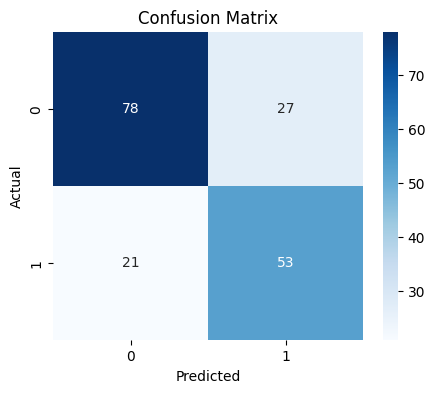

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Conclusions

- A Decision Tree Classifier was successfully trained to predict passenger survival.
- The model achieved good accuracy on the test dataset.
- Passenger class, gender, age, and fare played important roles in prediction.
- The confusion matrix helped evaluate correct and incorrect predictions.

